In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/Users/mohod/Developer/OTsim/brownian_ot')
# %matplotlib inline
import analysis as ana
from brownian_ot import analysis as anb

In [14]:
# getArrayTraj 
def getArrayTraj(toFind):
    trajs=[]
    Path =  "/Users/mohod/Developer/otsim/data/"
    folders  = os.listdir(Path)
    # print(folders)
    for id in toFind:
        for folder in folders:
            # print(folder)
            if(folder[0] != "."):
                files=""
                try:
                    files = os.listdir(Path+folder+"/data/")
                # print(Path+folder+"/data/")
                except Exception:
                #     print("some")
                    pass
                for file in files:
                    # print(Path+folder+"/data/")
                    filename = file.split("_")
                    # print(filename[-1])
                    uuid = int(filename[-1].split(".")[0])
                    filetype = filename[-1].split(".")[1]
                    # print(uuid)
                    if uuid == id and filetype=="npy":
                        trajs.append([Path+folder+"/data/"+file,ana.expand_trajectory(np.load(Path+folder+"/data/"+file))])
    return trajs

In [15]:
# getArrayRadius
def getArrayRadius(allTraj):
    ans = []
    sds = []
    # print(allTraj[1][1,:].shape)
    for traj in allTraj:
        # print(traj[0])
        radius, sd = ana.getRadius(traj[1])
        ans.append(radius)
        sds.append(sd)
    return ans,sds
def getArrayFrequency(allTraj):
    ans = []
    for traj in allTraj:
        ans.append(ana.getfreq(traj[1][:,0]))
    return np.abs(ans)
        

In [22]:
modes_ = [-5,-4,-3,-2,-1,1,2,3,4,5]
LCP_modeVar_ = getArrayTraj([6289987, 8741337, 1036851, 5808187,9714675, 2322232, 4847439, 5488811, 6897390, 7512004])
RCP_modeVar_ = getArrayTraj([4649125, 9528203, 7332875, 8074157,4723858, 7167251, 5728550, 1432530, 5600605, 4317625])
# modes_ = [-3]

# LCP_modeVar_ = getArrayTraj([1432530])
# RCP_modeVar_ = getArrayTraj([6647612])

ratio = 50

for m in range(len(modes_)):
    # print(LCP_modeVar_[m][1].shape,RCP_modeVar_[m][1].shape)
    
    LCP_modeVar_[m][1] = LCP_modeVar_[m][1][:-1:ratio,:]
    # print(LCP_modeVar_[m][1].shape, "LCP")
    
    # if m < 10 - 3:
    RCP_modeVar_[m][1] = RCP_modeVar_[m][1][:-1:ratio,:]
        # print(RCP_modeVar_[m][1].shape, "RCP")


# RCP_modeVar_[7][1] = RCP_modeVar_[7][1][:-1:ratio*2,:]
# RCP_modeVar_[8][1] = RCP_modeVar_[8][1][:-1:ratio*2,:]
# RCP_modeVar_[9][1] = RCP_modeVar_[9][1][:-1:ratio*2,:]

for m in range(len(modes_)):
    print(LCP_modeVar_[m][1].shape, "LCP")
    print(RCP_modeVar_[m][1].shape, "RCP")
    # plt.plot(LCP_modeVar_[m][1][:,0])
    

(20000, 12) LCP
(20000, 12) RCP
(20000, 12) LCP
(20000, 12) RCP
(20000, 12) LCP
(20000, 12) RCP
(20000, 12) LCP
(20000, 12) RCP
(20000, 12) LCP
(20000, 12) RCP
(20000, 12) LCP
(20000, 12) RCP
(20000, 12) LCP
(20000, 12) RCP
(20000, 12) LCP
(20000, 12) RCP
(20000, 12) LCP
(20000, 12) RCP
(20000, 12) LCP
(20000, 12) RCP


In [23]:
LCP_dorb= []
RCP_dorb= []

for i in range(len(modes_)):
    LCP_dorb.append(ana.deorbit_particle_axes(LCP_modeVar_[i][1]))
    RCP_dorb.append(ana.deorbit_particle_axes(RCP_modeVar_[i][1]))

LCP_dorb = np.array(LCP_dorb)
print(LCP_dorb.shape)
RCP_dorb = np.array(RCP_dorb)
print(LCP_dorb.shape)

(10, 20000, 12)
(10, 20000, 12)


In [24]:
LCP_axisCor= []
RCP_axisCor= []

# temp = anb.calc_axis_autocorr(LCP_modeVar_[0][1], max_steps=20000)

for i in range(len(modes_)):
    maxStep = int(len(LCP_dorb[i][:,0])*0.1)
    LCP_axisCor.append(np.array(anb.calc_axis_autocorr(LCP_dorb[i], max_steps=maxStep)))
    RCP_axisCor.append(np.array(anb.calc_axis_autocorr(RCP_dorb[i], max_steps=maxStep)))

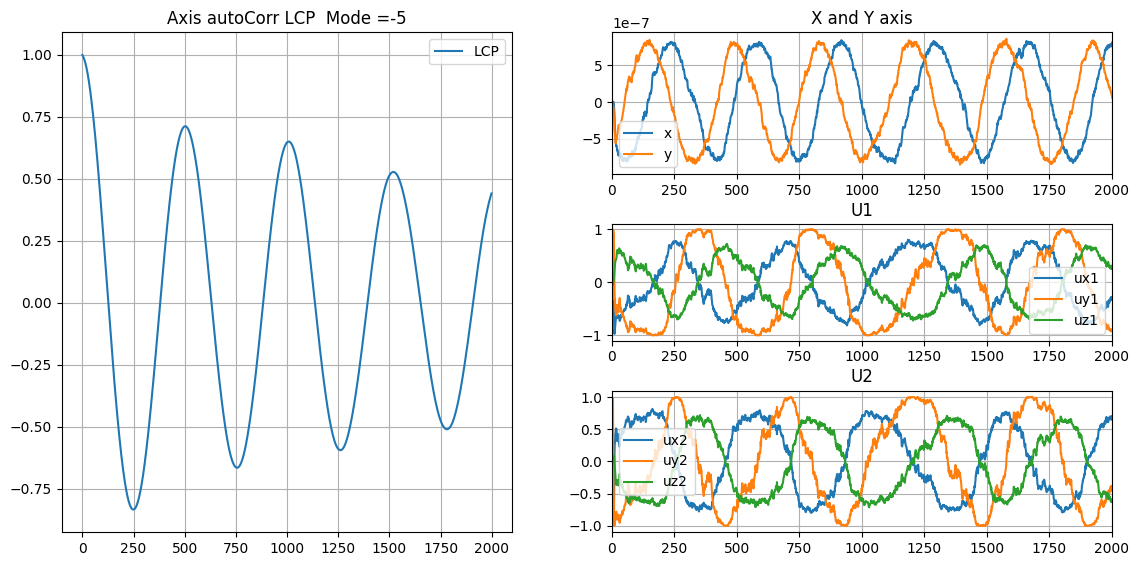

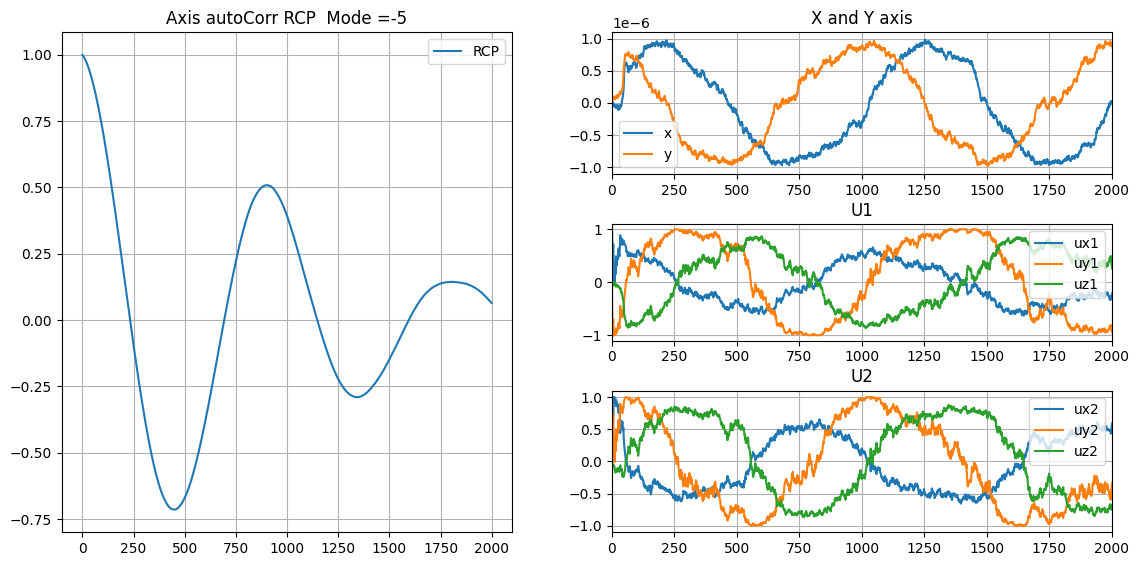

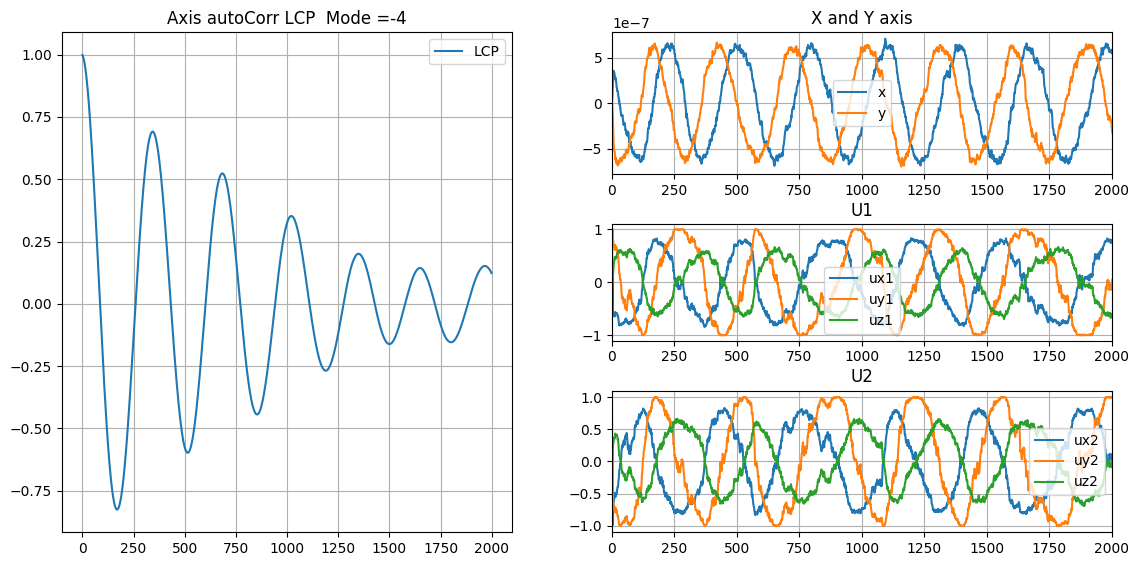

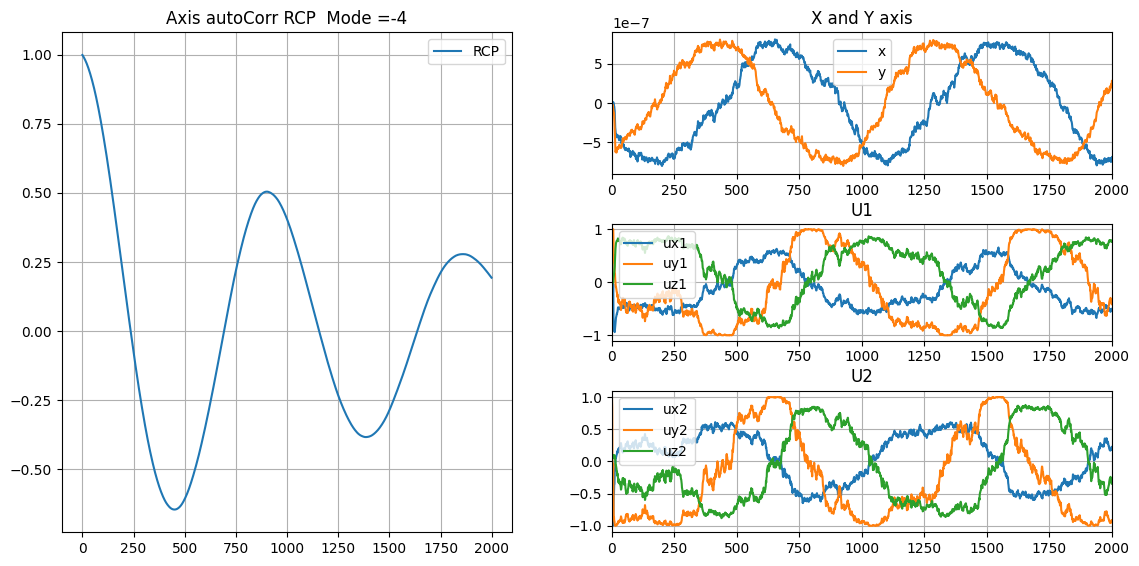

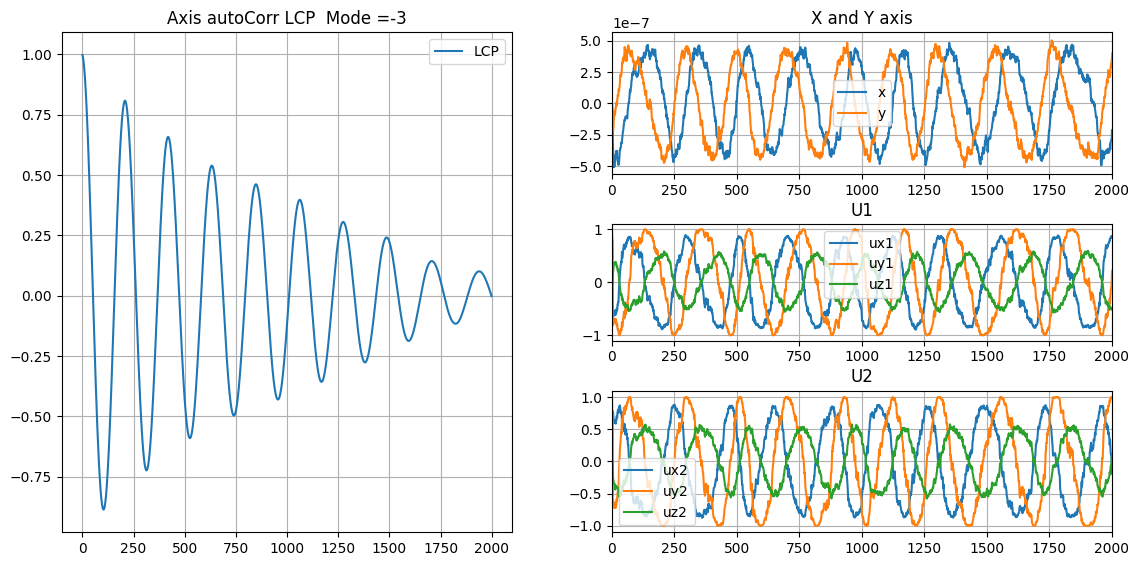

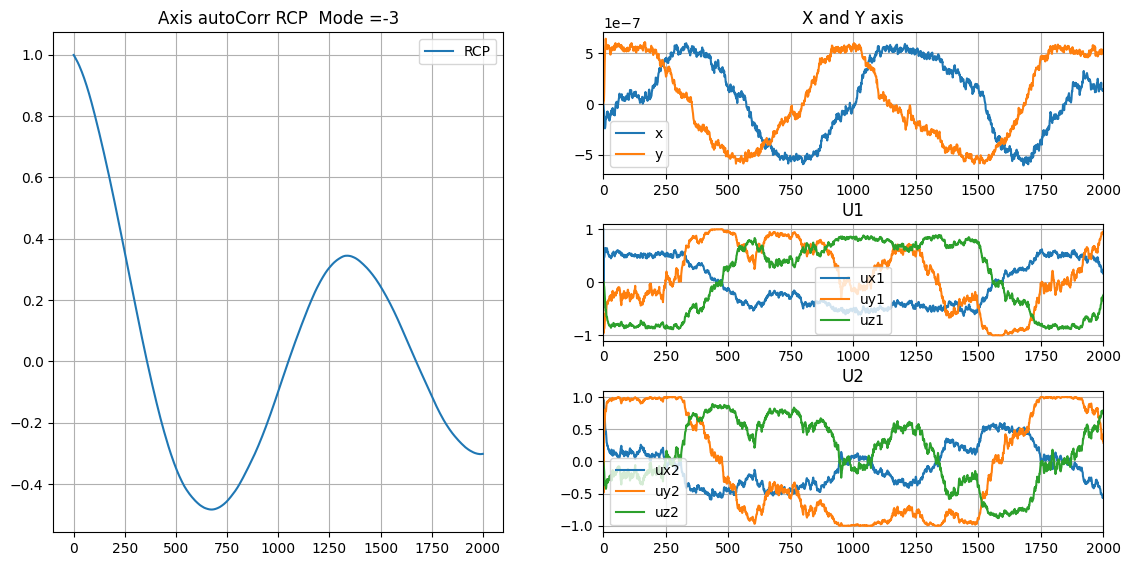

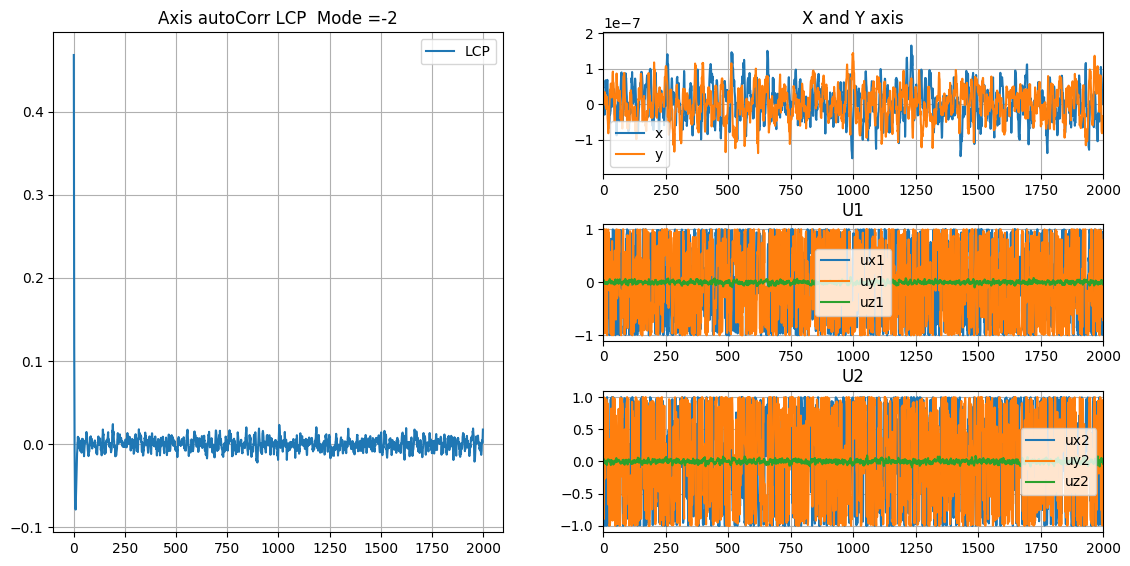

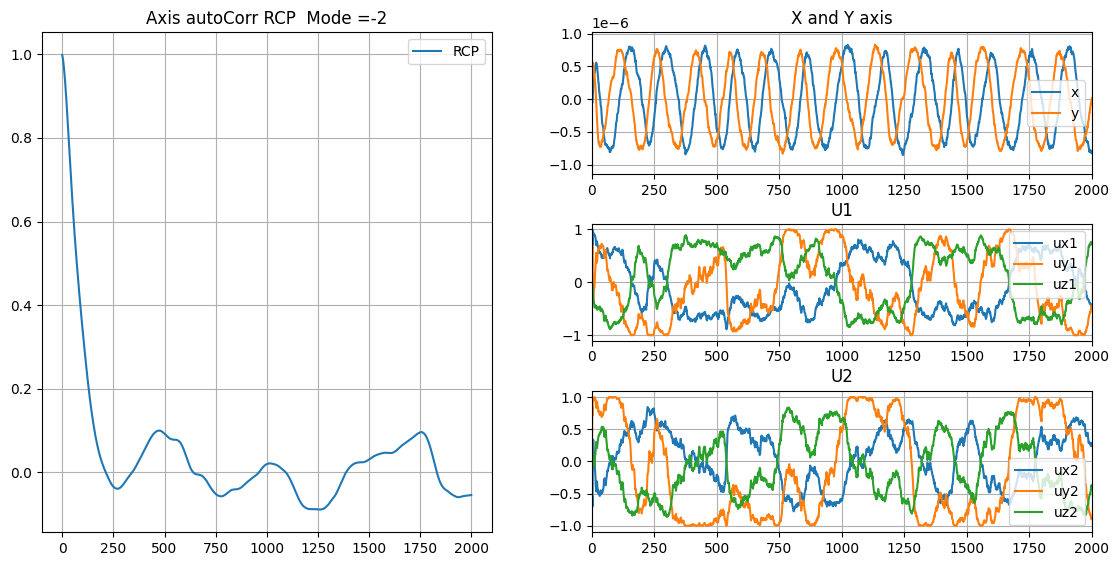

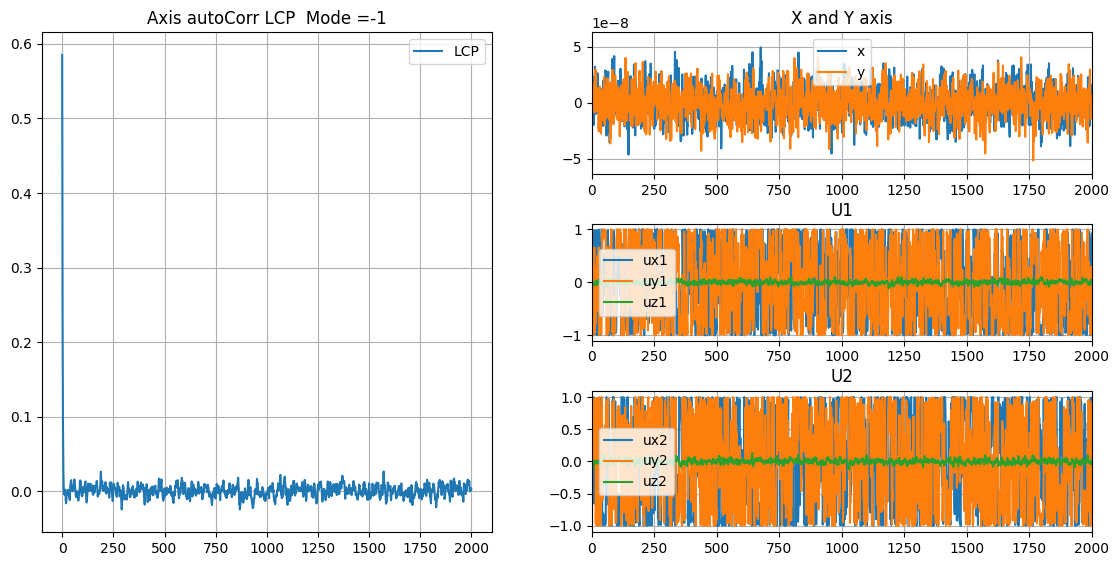

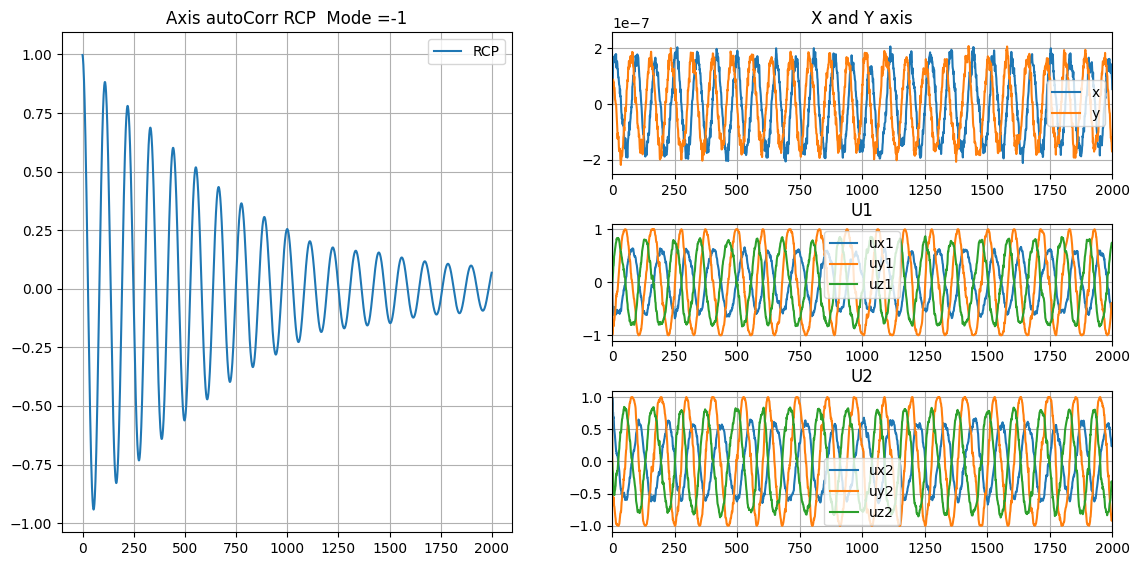

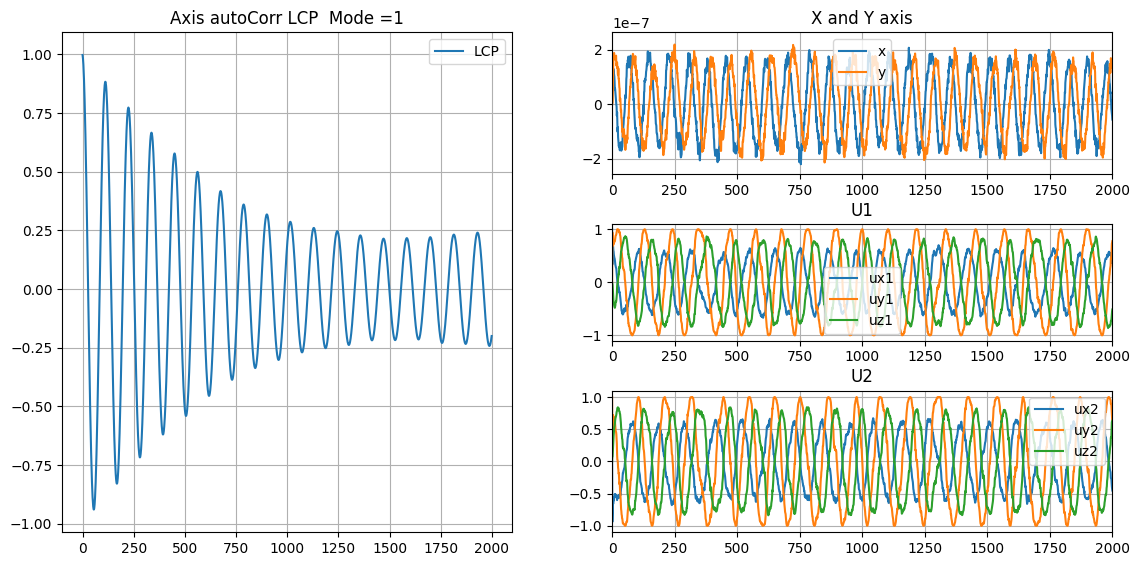

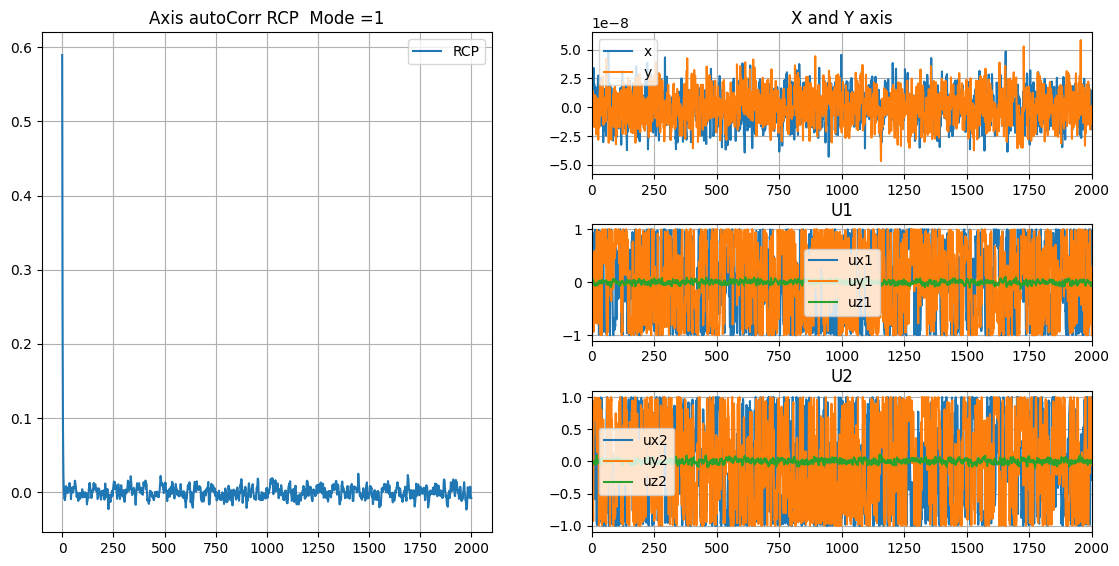

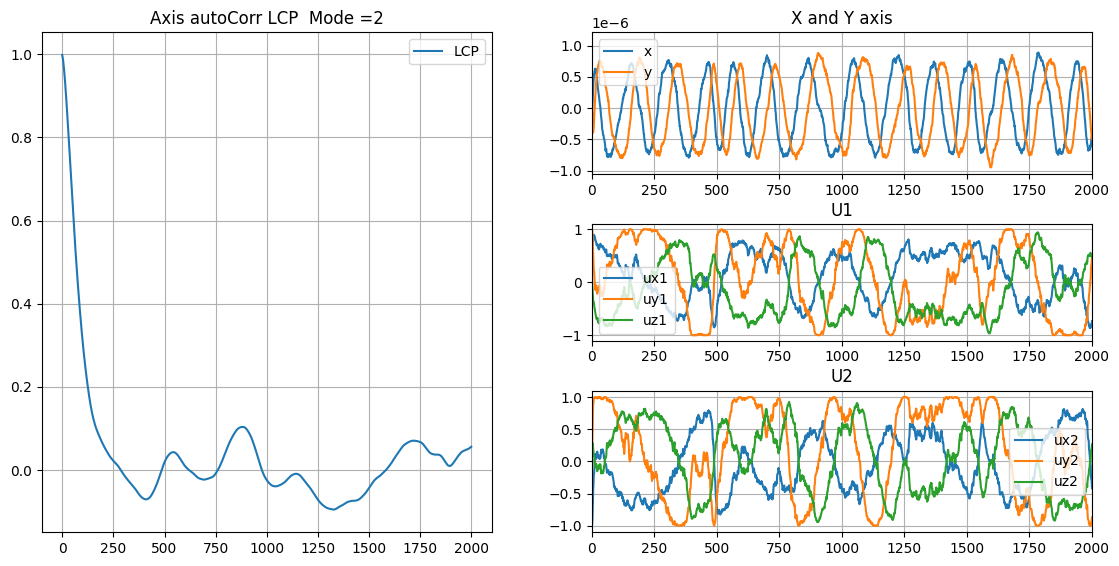

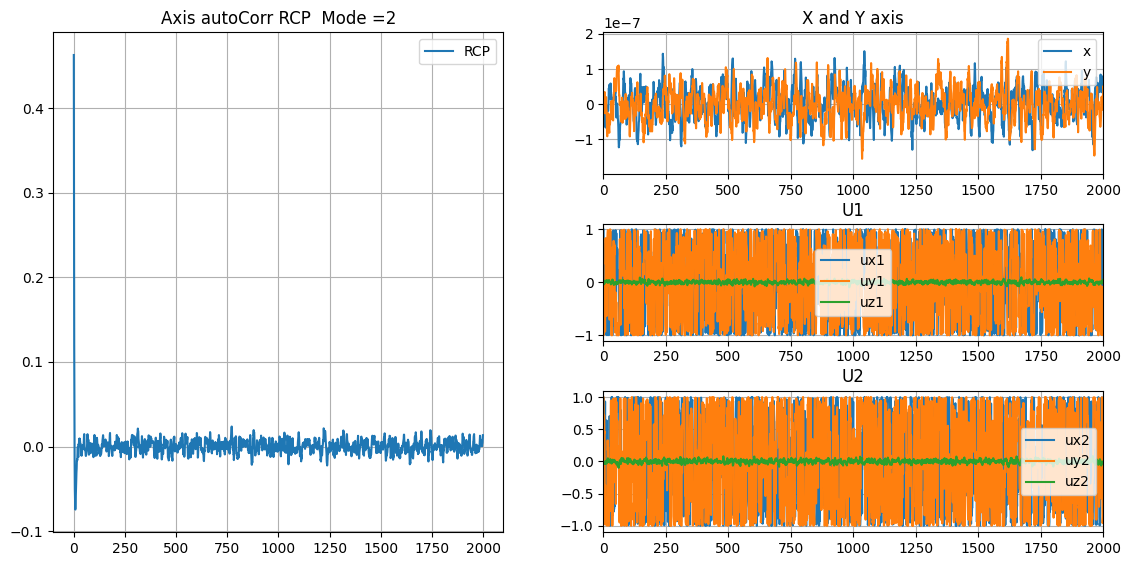

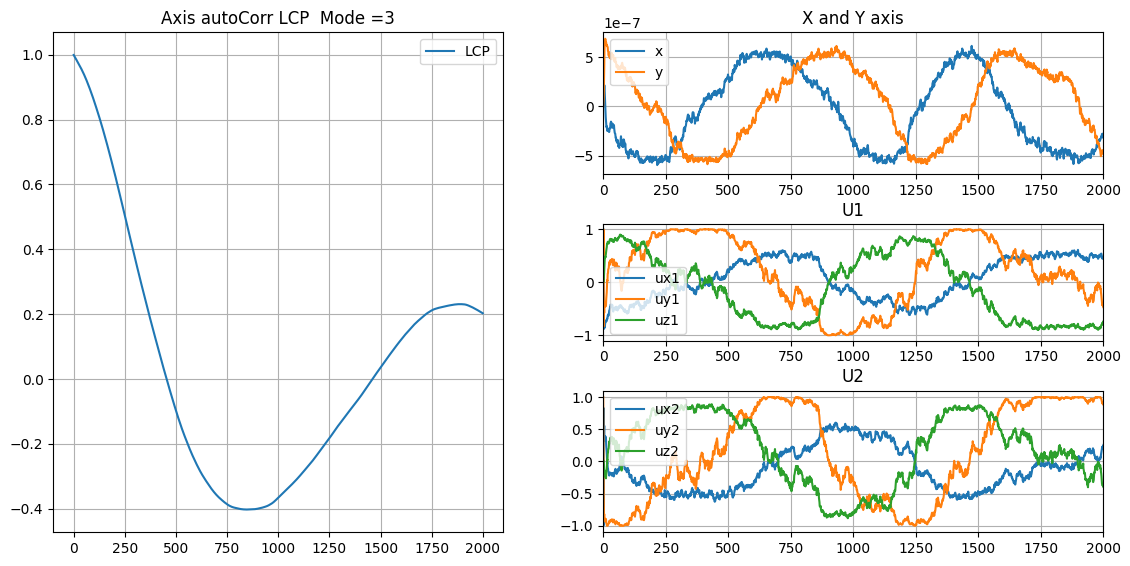

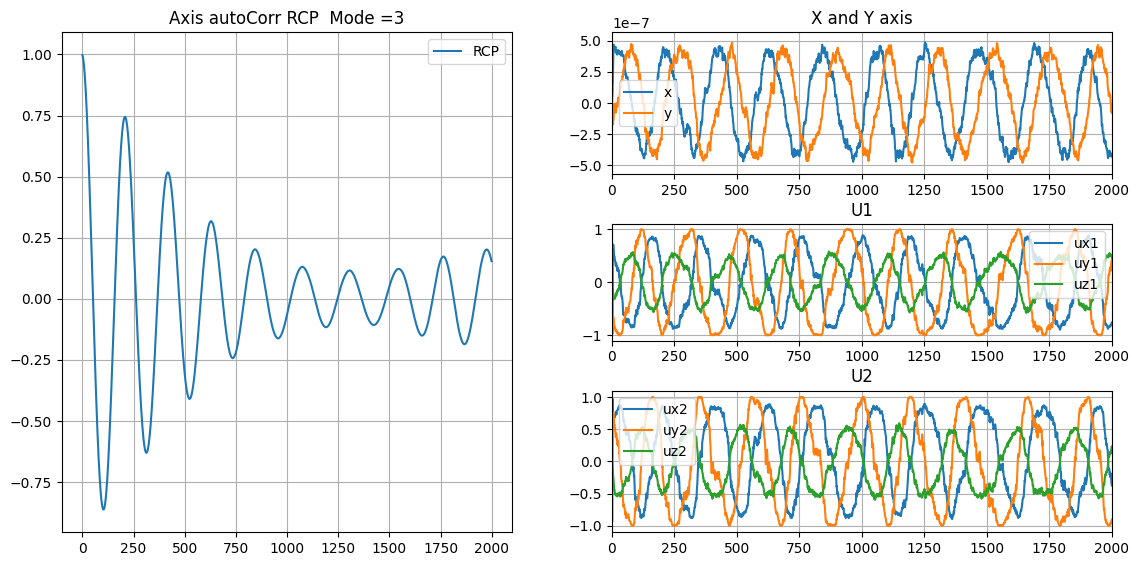

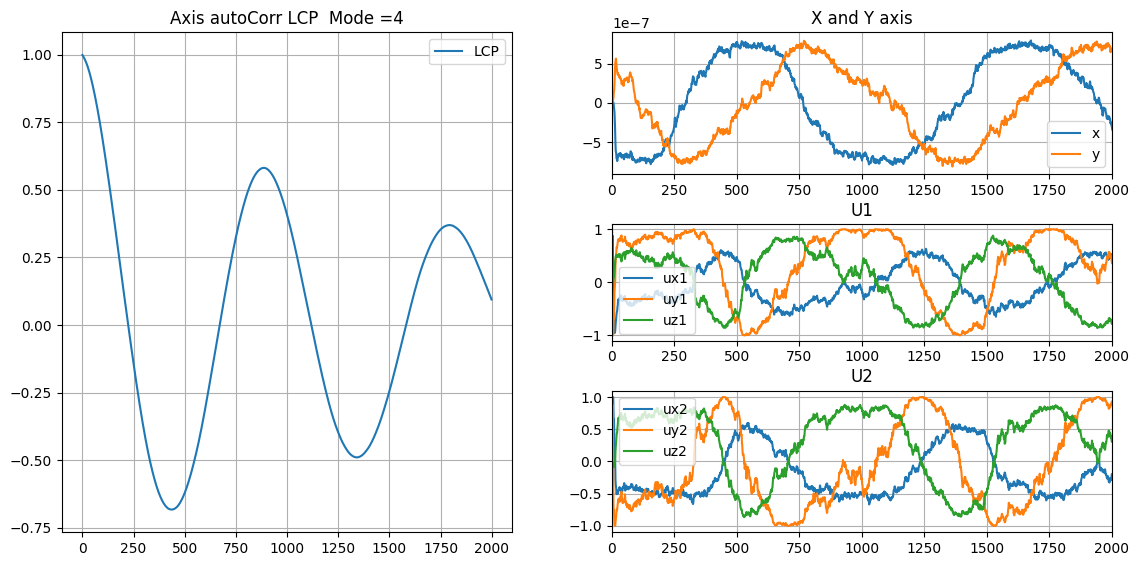

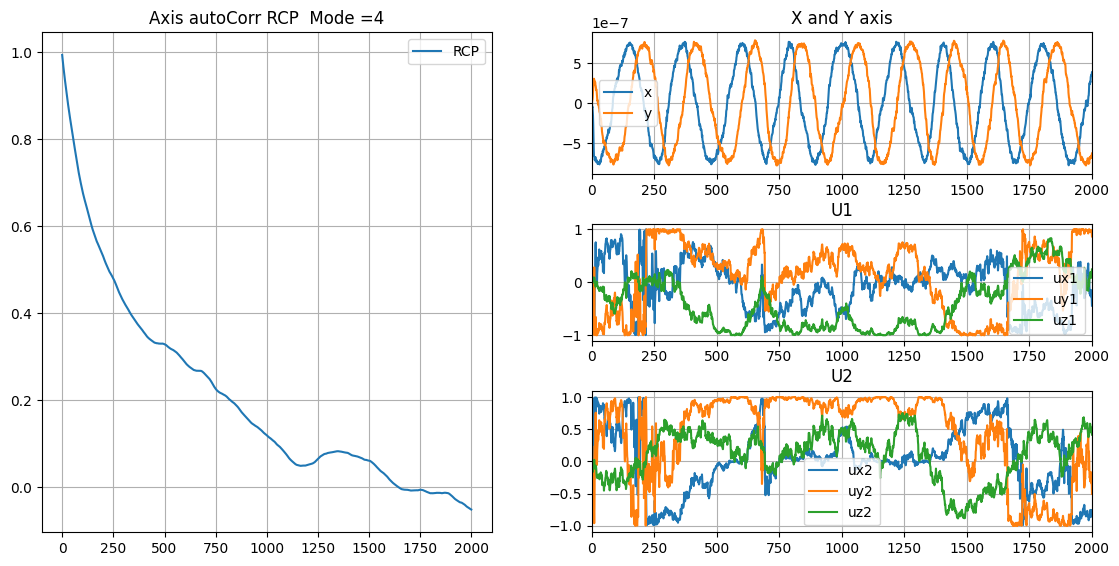

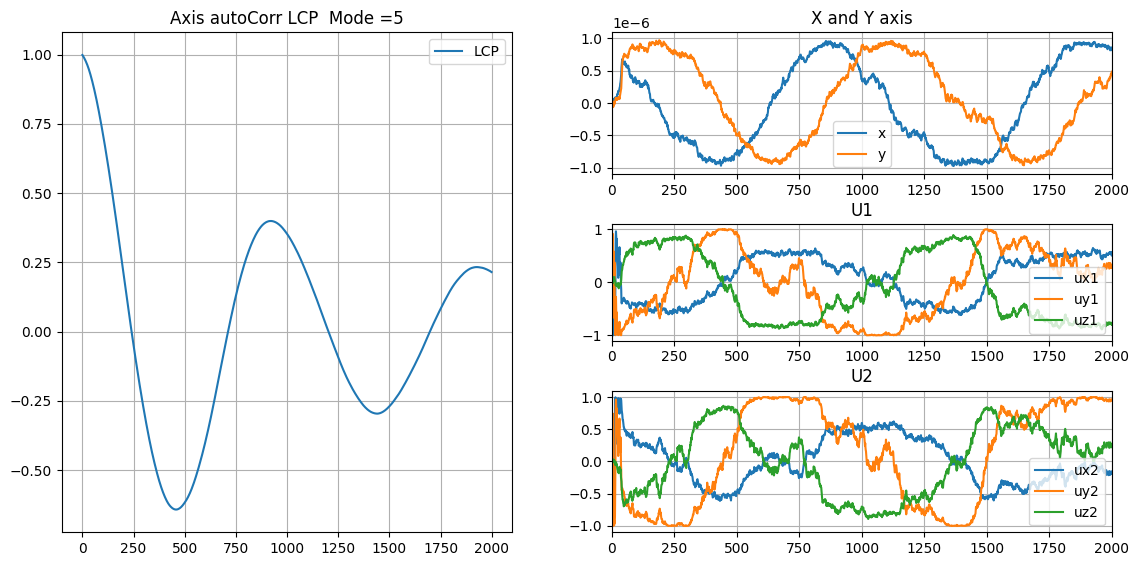

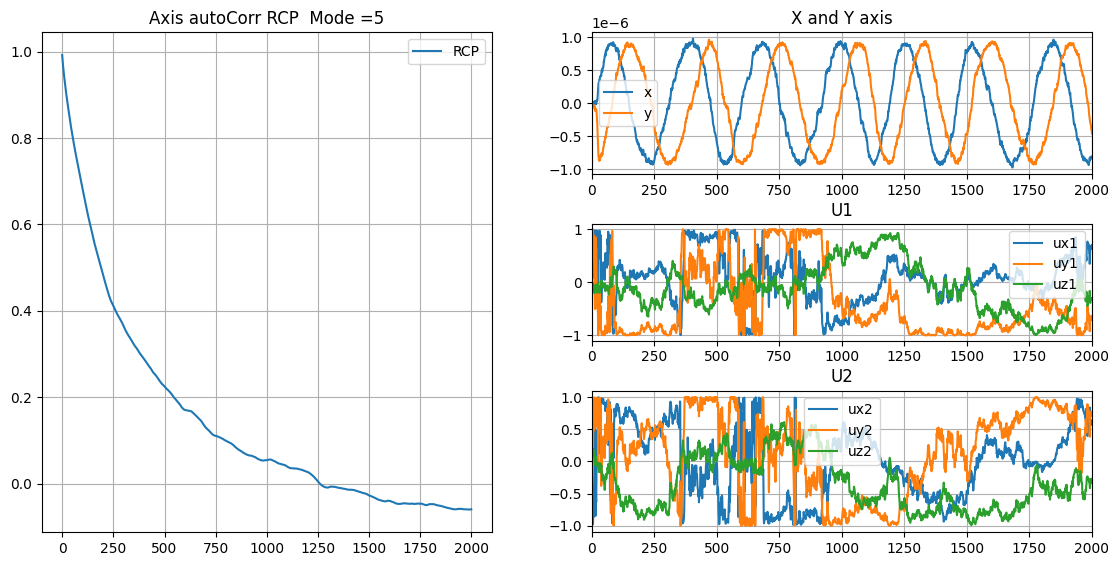

In [29]:
count=0
for i in range(len(modes_)):
    fig = plt.figure(figsize=(10,5))
    
    ax1 = fig.add_axes([0, 0, 0.45, 1]) 
    ax1.grid()
    ax1.set_title("Axis autoCorr LCP  Mode ="+ str(modes_[i]))
    ax1.plot(LCP_axisCor[i][0,:],label="LCP")  
    # ax1.plot(RCP_axisCor[i][0,:],label="RCP")  
    ax1.legend()
    
    ax2 = fig.add_axes([0.55, 2/3 +0.05, 0.5, 1/3 -0.05])  
    ax2.grid()
    ax2.set_title("X and Y axis")
    ax2.plot(LCP_modeVar_[i][1][:,0],label="x") 
    ax2.plot(LCP_modeVar_[i][1][:,1],label="y") 
    ax2.set_xlim(0,2000)
    ax2.legend()
    
    ax3 = fig.add_axes([0.55, 1/3 +0.05, 0.5, 1/3 -0.1])  
    ax3.grid()
    ax3.set_title("U1")
    ax3.plot(LCP_dorb[i][:,3],label="ux1") 
    ax3.plot(LCP_dorb[i][:,4],label="uy1")
    ax3.plot(LCP_dorb[i][:,5],label="uz1")
    ax3.set_xlim(0,2000)
    ax3.legend() 
    
    ax4 = fig.add_axes([0.55, 0, 0.5, 1/3 -0.05])  
    ax4.grid()
    ax4.set_title("U2")
    ax4.plot(LCP_dorb[i][:,6],label="ux2") 
    ax4.plot(LCP_dorb[i][:,7],label="uy2") 
    ax4.plot(LCP_dorb[i][:,8],label="uz2") 
    ax4.set_xlim(0,2000)
    ax4.legend()
    plt.show()
    
    fig = plt.figure(figsize=(10,5))
    
    ax1 = fig.add_axes([0, 0, 0.45, 1]) 
    ax1.grid()
    ax1.set_title("Axis autoCorr RCP  Mode ="+ str(modes_[i]))
    # ax1.plot(LCP_axisCor[i][0,:],label="LCP")  
    ax1.plot(RCP_axisCor[i][0,:],label="RCP")  
    ax1.legend()
    
    ax2 = fig.add_axes([0.55, 2/3 +0.05, 0.5, 1/3 -0.05])  
    ax2.grid()
    ax2.set_title("X and Y axis")
    ax2.plot(RCP_modeVar_[i][1][:,0],label="x") 
    ax2.plot(RCP_modeVar_[i][1][:,1],label="y") 
    ax2.set_xlim(0,2000)
    ax2.legend()
    
    ax3 = fig.add_axes([0.55, 1/3 +0.05, 0.5, 1/3 -0.1])  
    ax3.grid()
    ax3.set_title("U1")
    ax3.plot(RCP_dorb[i][:,3],label="ux1") 
    ax3.plot(RCP_dorb[i][:,4],label="uy1")
    ax3.plot(RCP_dorb[i][:,5],label="uz1")
    ax3.set_xlim(0,2000)
    ax3.legend() 
    
    ax4 = fig.add_axes([0.55, 0, 0.5, 1/3 -0.05])  
    ax4.grid()
    ax4.set_title("U2")
    ax4.plot(RCP_dorb[i][:,6],label="ux2") 
    ax4.plot(RCP_dorb[i][:,7],label="uy2") 
    ax4.plot(RCP_dorb[i][:,8],label="uz2") 
    ax4.set_xlim(0,2000)
    ax4.legend()
    plt.show()
    

    count+=1